<a href="https://colab.research.google.com/github/Harriet-ngomo/Sustainable-forest-management/blob/main/Stats_Webinar_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Concepts Webinar - Part 1

The following topics are covered in this webinar:

* An Overview of Statistics
* Statistics & Data Science
* Statistics Fundamentals
 * Population vs Sample
 * Parameter vs Statistics
 * Data Classification
 * Descriptive Statistics
 * Measurements of Location & Spread
 * Discrete vs Continuous Random Variables
 * Notations & Symbols
 * Binomial Distribution
 * Geometric Distribution
 * Poisson Distribution
 * Uniform Distribution
 * Exponential Distribution
 * Normal/Gaussian Distribution
 * Standard Normal Distribution
 * Central Limit Theorem


In [ ]:
##import necessary libraries for this notebook##
import pandas as pd
import numpy as np
#data visualization
import matplotlib.pyplot as plt
#statistical distributions
import scipy.stats as stats
#for inline plots in jupyter
%matplotlib inline
#import matplotlib
import matplotlib.pyplot as plt
#generating random numbers
import random

In [ ]:
#create a dictionary of series
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack',
   'Lee','David','Gasper','Betina','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])}
#create a data frame
df = pd.DataFrame(d)
print(df)
#Descriptive statistics
print(df.describe())
#calculate the Bressel standard deviation
print(df.std())

      Name  Age  Rating
0      Tom   25    4.23
1    James   26    3.24
2    Ricky   25    3.98
3      Vin   23    2.56
4    Steve   30    3.20
5    Smith   29    4.60
6     Jack   23    3.80
7      Lee   34    3.78
8    David   40    2.98
9   Gasper   30    4.80
10  Betina   51    4.10
11  Andres   46    3.65
             Age     Rating
count  12.000000  12.000000
mean   31.833333   3.743333
std     9.232682   0.661628
min    23.000000   2.560000
25%    25.000000   3.230000
50%    29.500000   3.790000
75%    35.500000   4.132500
max    51.000000   4.800000
Age       9.232682
Rating    0.661628
dtype: float64


# Probability Distributions
Numerous statistical techniques and tools used in data science are based on probability distributions. When working with data, variables/features in the columns of the data set can be thought of as random variables: variables that vary due to chance. A probability distribution describes how a random variable is distributed and informs data scientists/statisticians which values a random variable is most likely to take on and which values are less likely.

There are a range of precisely defined probability distributions that have different shapes and can be used to model different types of random events. In this notebook we'll discuss some common probability distributions and how to work with them in Python. Numerous useful functions for working with probability distributions in Python are contained in **scipy.stats** library that is already loaded into this notebook.

Probability distributions in scipy come with several useful functions for generating random data and extracting values of interest. These functions are summarized as follows:

*   stats.distribution.rvs(): Generates random numbers from the specified distribution. The arguments to rvs() will vary depending on the type of distribution.
*   stats.distribution.cdf(): Also known as the cumulative distribution function (CDF), gives you the area under the distribution's density curve to the left of a certain value on the x axis.

*   stats.distribution.ppf(): This function is the inverse of cdf() and it returns the x axis cutoff value (quantile) associated with a given probability.

*   stats.distribution.pdf(): Calculates the probability density function (PDF) at a given x value.

**The Uniform Distribution**

The uniform distribution is a probability distribution where each value within a certain range is equally likely to occur and values outside of the range never occur. In the code below, we generated 100,000 data points from a uniform distribution spanning the range 0 to 10.


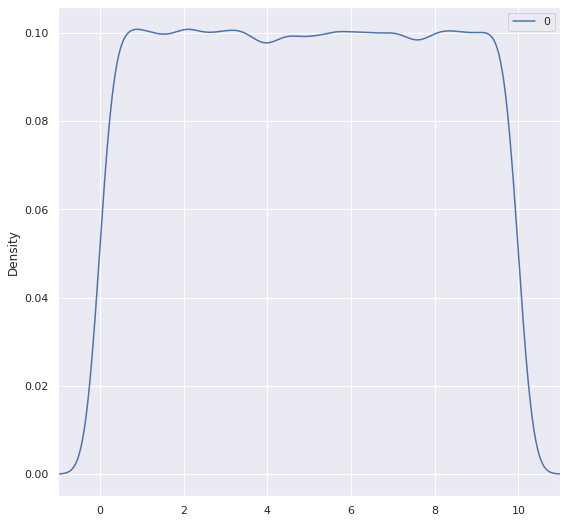

In [ ]:
#import Uniform distribution
from scipy.stats import uniform
#100000 random numebrs from uniform distribution from 0 to 10
n=100000
start=0
width=10
uniform_data=stats.uniform.rvs(size=n,loc=start,scale=width)
#plot the distribution
pd.DataFrame(uniform_data).plot(kind="density",
                               figsize=(9,9),
                               xlim=(-1,11));

Please note that the above plot is an approximation of the underlying distribution, since it is based on a sample of observations. The density plot of our uniform data is essentially level meaning any given value has the same probability of occuring and the area under a probability density curve is always equal to 1.

The following examples illustrate the usage of different functions availalbe in scipy package in Python:

**Example 1: CDF Function**

In [ ]:
stats.uniform.cdf(x=2.5,         #cutoff value (quantile) to check
                  loc=0,         #distribution start
                  scale=10)      #distribution end

0.25

**Example 2: PPF Function**

In [ ]:
stats.uniform.ppf(q=0.4,         #probability cutoff
                  loc=0,         #distribution start
                  scale=10)      #distribution end

4.0

**Example 3: PDF Function**

In [ ]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


**Generating Random Numbers and Setting The Seed**

In some cases, a statistician/data scientist needs to generate random real numbers in a range with equal probability. You can draw numbers from a uniform distribution using stats.distribution.rvs() function. Python also has a library called **"random"** that lets you perform various operations that involve randomization. Notice that regardless of the method you use to generate random numbers, however, the result of a random process can differ from one run to the next.

Let's look at a few functions in the random library:

In [ ]:
import random
#get a random integer in the specified range
random.randint(0,10)

7

In [ ]:
#get a random element from a sequence
random.choice([2,4,6,9])

6

In [ ]:
#get a real number between 0 and
random.random()

0.6574725026572553

In [ ]:
#get a real number in the specified range
random.uniform(0,10)

6.664104711248381

Since results vary each time you run a function from the random package, this is not desirable. You can ensure that your results are the same each time you use a function that involves randomness by setting the random number generator's seed value to initialize it prior to running the function.This reproducibility illustrates the fact that these random numbers aren't truly random, but rather "pseudorandom".

In [ ]:
#set the seed to an arbitrary value
random.seed(12)
print([random.uniform(0,10) for x in range(4)])
#set the seed to the same value
random.seed(12)
print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


**The Normal/Gaussian Distribution**

The normal distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve and it is the most important distribution in statistics. The empirical rule as a rule of thumb states that about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.

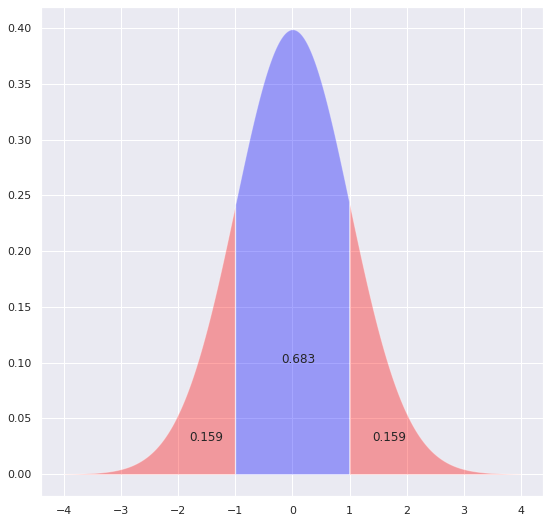

In [ ]:
#import Normal distribution
from scipy.stats import norm
# Plot normal distribution areas
prob_under_minus1 = stats.norm.cdf(x= -1,
                                loc = 0,
                                scale= 1)
prob_over_1 = 1 - stats.norm.cdf(x= 1,
                                loc = 0,
                                scale= 1)
between_prob = 1-(prob_under_minus1+prob_over_1)
plt.rcParams["figure.figsize"] = (9,9)

plt.fill_between(x=np.arange(-4,-1,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01),
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01),
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

**The Binomial Distribution**

The binomial distribution is a discrete probability distribution that models the outcomes of a given number of random trials of some experiment or event. For example, we could model flipping a fair coin 10 times with a binomial distribution where the number of trials is set to 10 and the probability of success is set to 0.5. In this case the distribution would tell us how likely it is to get zero heads, 1 head, 2 heads and so on.

col_0   0   1    2     3     4     5     6     7    8    9   10
row_0                                                          
counts  15  83  452  1192  2022  2418  2062  1203  433  105  15


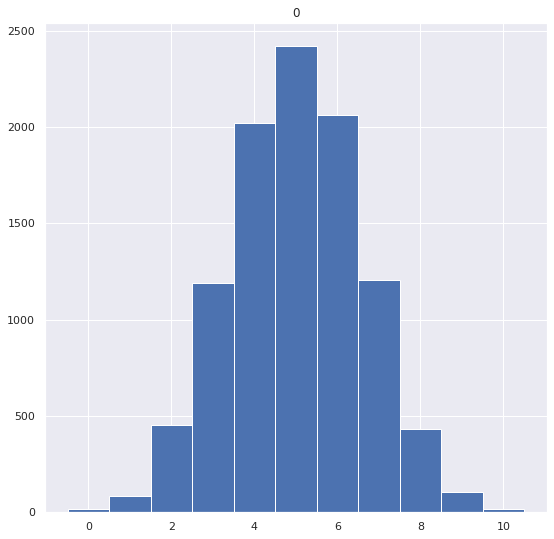

In [ ]:
#import Binomial Distribution
from scipy.stats import binom
fair_coin_flips = stats.binom.rvs(n=10,        #number of flips per trial
                                  p=0.5,       #success probability
                                  size=10000)  #number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

**The Exponential & Geometric Distribution**

These distributions model the time it takes for an event to occur. The geometric distribution is discrete and models the number of trials it takes to achieve a success. The exponential distribution is a continuous analog of the geometric distribution and models the amount of time you have to wait befor an event occurs given a certain occurence rate.

col_0     1     2     3    4    5    6   7   8   9   10  11  13  15  17
row_0                                                                  
counts  4996  2527  1221  600  311  179  86  35  20  12   9   2   1   1


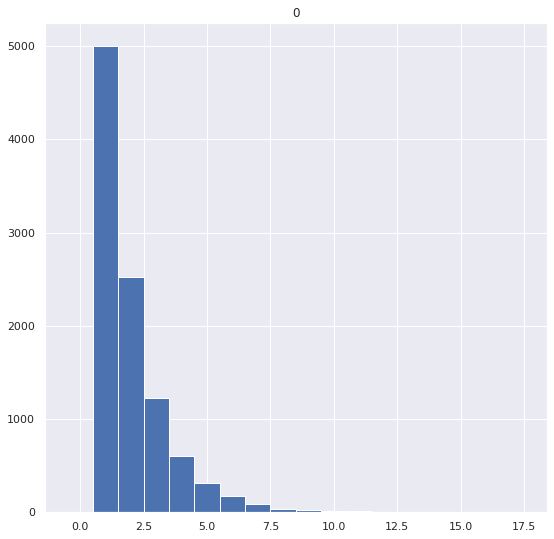

In [ ]:
#import geometric distribution
from scipy.stats import geom
random.seed(12)
flips_till_heads = stats.geom.rvs(size=10000,  #generate geometric data
                                  p=0.5)       #with success prob 0.5
#print table of counts
print( pd.crosstab(index="counts", columns= flips_till_heads))
#plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1);

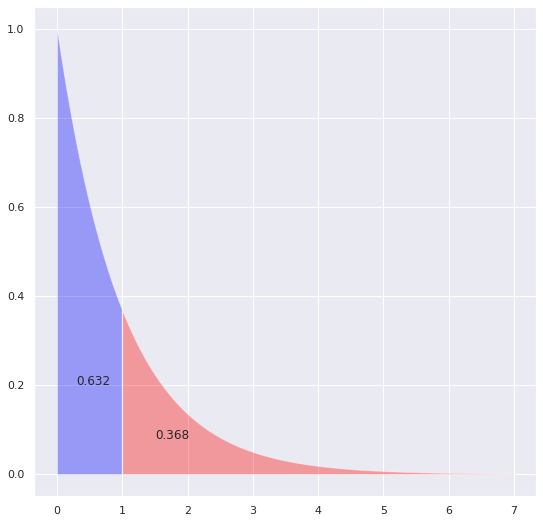

In [ ]:
#import exponential distribution
from scipy.stats import expon
random.seed(12)
#get the probability of waiting more than 1 time unit before a success
prob_1 = stats.expon.cdf(x=1,
                         scale=1)
1 - prob_1
plt.fill_between(x=np.arange(0,1,0.01),
                 y1= stats.expon.pdf(np.arange(0,1,0.01)), #generate exponential data
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01),
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)
plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3));

**The Poisson Distribution**

This distribution models the probability of seeing a certain number of successes within a time intervale, where the time it takes for the next success is modeled by an exponential distribution. For example, the Poisson distribution can be used to model traffic or the number of emails you'd expect to recieve in a week.

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3736  3624  1878  572  155  31  3  1


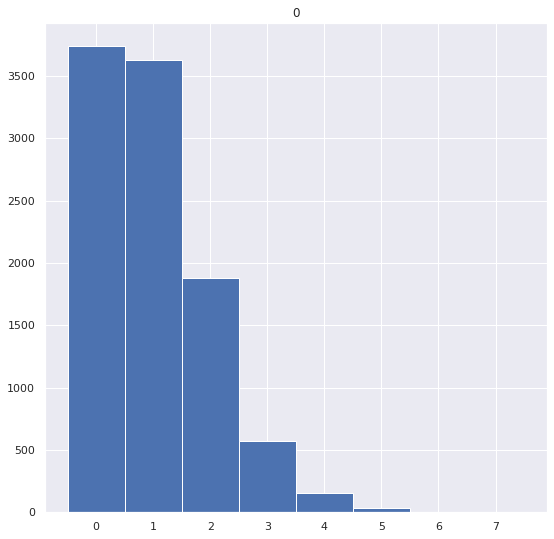

In [ ]:
#import Poisson distribution
from scipy.stats import poisson
random.seed(12)
arrival_rate_1 = stats.poisson.rvs(size=10000,  #generate Poisson data
                                   mu=1 )       #average arrival time 1
#print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

#plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1);

**Skewness & Kurtosis**

Beyond measures of center and spread, descriptive statistics include measures that give information related to the shape of a distribution. Skewness is a measure of symmetry of a distribution while kurtosis measures how data is in the tails of a distribution.

To explore these two measures further, let's create some dummy data and inspect it:

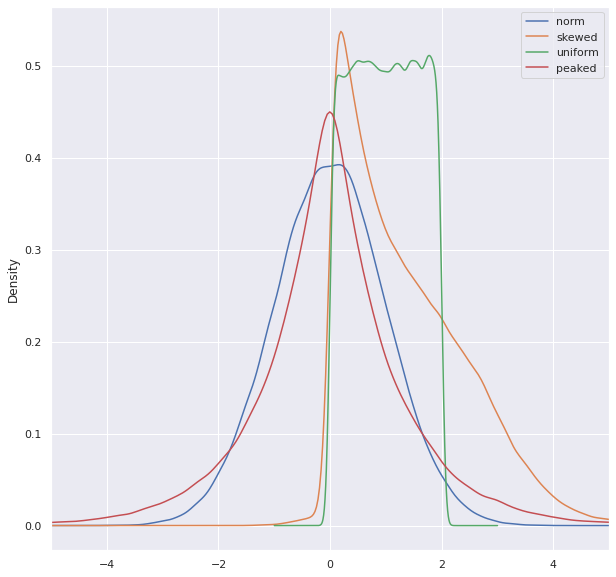

In [ ]:
#generate random numbers fromm the normal distribution
norm_data = np.random.normal(size=100000)
#skewed data
skewed_data = np.concatenate((np.random.normal(size=35000)+2,
                             np.random.exponential(size=65000)),
                             axis=0)
#uniform data
uniform_data = np.random.uniform(0,2, size=100000)
#peaked data
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)
data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})
data_df.plot(kind="density",
            figsize=(10,10),
            xlim=(-5,5));

Let's check the skewness of each of the distributions. Skewness measures asymmetry, we'd expect to observe low skewness for all of the distributions except the skewed one, because all the others are roughly symmetric:

In [ ]:
#check the skewness
data_df.skew()

norm      -0.006943
skewed     1.010480
uniform   -0.004978
peaked     0.024834
dtype: float64

In [ ]:
#check the kurtosis
data_df.kurt()

norm      -0.006544
skewed     1.359436
uniform   -1.200876
peaked     2.958035
dtype: float64

From the output one can observe that the normally distributed data has a kurtosis near zero, the flat distribution has negative kurtosis and the two distributions with more data in the tails vs the center have higher kurtosis.

# Conclusion

*   Descriptive statistics help data scientists explore features of the data, like center, spread and shape by summarizing them with numerical measurements.
*   Descriptive statistics help inform the direction of an analysis and let you communicate your insights to others quickly.

*   Certain values, like the mean and variance, are used in all sorts of statistical tests and predictive models.
*   Python's scipy library contains functions that make it easy to work with a wide range probability distributions. For a complete list of functions follow this link: https://docs.scipy.org/doc/scipy/reference/stats.html
*   Probability distribution functions in Python are useful for generating random data, modeling random events and aiding with statistical tests and analysis